# Importing the global height data
### Importing modules

In [1]:
# importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint

### Importing raw file

In [2]:

# athlete events df from csv
global_file = os.path.join("..","data", "rawData","NCD_RisC_eLife_2016_height_age18_countries.txt")
global_df = pd.read_csv(global_file, encoding="ISO-8859-1")

# To get the raw data count, commented out to keep the original df .head() results prominent
raw_count = len(global_df)

# preview the raw data
global_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077


### Check for nulls...

In [3]:
# checking for any null values
pd.isna(global_df).any()

# looks good!


Country                                            False
ISO                                                False
Sex                                                False
Year of birth                                      False
Mean height (cm)                                   False
Mean height lower 95% uncertainty interval (cm)    False
Mean height upper 95% uncertainty interval (cm)    False
dtype: bool

### Correcting the measures!  Also adding "Olympic Year", an offset of 24

In [4]:
# conver the height stuff
global_df['Mean height (inches)'] = global_df['Mean height (cm)'].apply(lambda x: x / 2.54)
global_df['Mean height lower 95% uncertainty interval (inches)'] = global_df['Mean height lower 95% uncertainty interval (cm)'].apply(lambda x: x / 2.54)
global_df['Mean height upper 95% uncertainty interval (inches)'] = global_df['Mean height upper 95% uncertainty interval (cm)'].apply(lambda x: x / 2.54)

# setting offset to 24 for now
offset = 24

global_df['Olympic Year'] = global_df['Year of birth'] + offset

# looking at new columns
global_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033,63.450431,60.820585,66.044895,1920
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618,63.463105,60.854962,66.007724,1921
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576,63.475707,60.908402,65.985266,1922
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113,63.488475,60.958915,65.955950,1923
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077,63.501208,61.007693,65.948062,1924


### chart the data over time (men/women 1896-1996)

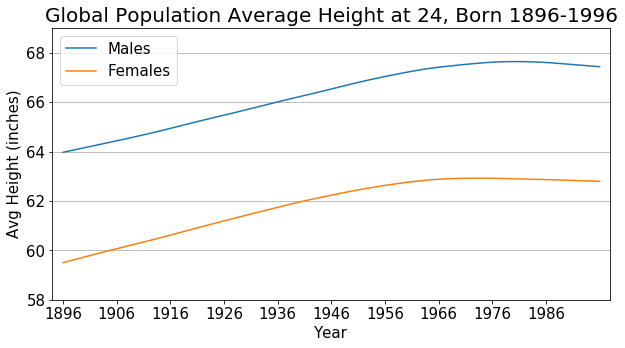

In [12]:
# group by to get the average
global_avg = pd.DataFrame(global_df.groupby(['Year of birth','Sex'])['Mean height (inches)'].mean().reset_index())

# pivot to get 1 column per gender
global_pivot = global_avg.pivot(index='Year of birth', columns='Sex', values = 'Mean height (inches)').reset_index()

# rename columns
global_pivot = global_pivot.rename(columns={'Men':'Males', 'Women': 'Females'})
global_pivot.head()

x_ticks = np.arange(1896,1996,10)

global_chart = global_pivot.plot(
    x = 'Year of birth',
    y = ['Males', 'Females'],
    figsize=(10,5),
    ylim = (58,69),
    xlim = (1894,1998),
    fontsize = 15
)

# add axis labels
global_chart.set_xlabel("Year", fontsize=15)
global_chart.set_ylabel('Avg Height (inches)', fontsize=15)
global_chart.set_xticks(x_ticks)
global_chart.yaxis.grid(True)
global_chart.legend(loc='best',fontsize=15)
global_chart.set_title('Global Population Average Height at 24, Born 1896-1996', fontdict={'fontsize': 20, 'fontweight': 'medium'})

global_chart.get_figure().savefig('..\images\global_height_1896_2016.png')

### Just the men to match the Olympic data...

In [6]:
men_df = global_df.loc[global_df['Sex']=='Men']

men_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033,63.450431,60.820585,66.044895,1920
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618,63.463105,60.854962,66.007724,1921
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576,63.475707,60.908402,65.985266,1922
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113,63.488475,60.958915,65.955950,1923
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077,63.501208,61.007693,65.948062,1924


### Save a copy of this file, we want to compare it to the olympian data in that cleaning process...

In [7]:
full_file = os.path.join("..", "data", "cleanData", "Mens_WorldHeight_AllYears.csv")
men_df.to_csv(full_file, index=False, header=True)

### Grab only 1960-2016, but at estimated Olympic age (since we have DOB)

In [8]:
# now just grab the years we are interested in "Olympic Year" >= 1960 and <= 2016
men_modern_df = men_df.loc[men_df['Olympic Year']>=1960]

men_modern_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
40,Afghanistan,AFG,Men,1936,163.165960,157.968732,168.464454,64.238567,62.192414,66.324588,1960
41,Afghanistan,AFG,Men,1937,163.236298,158.082179,168.544301,64.266259,62.237078,66.356024,1961
42,Afghanistan,AFG,Men,1938,163.305397,158.112578,168.595025,64.293463,62.249047,66.375994,1962
43,Afghanistan,AFG,Men,1939,163.372994,158.192114,168.674952,64.320076,62.280360,66.407462,1963
44,Afghanistan,AFG,Men,1940,163.438996,158.235582,168.720947,64.346061,62.297473,66.425570,1964


### Now only go every 4 years...

In [9]:
# series of the Olympic years (every 4)
olympic_yrs = np.arange(1960,2020,4)

# # make it a dataframe
olympicYr_df = pd.DataFrame({
    'Olympic Year': olympic_yrs
})

# now merge with global height data
globalOlympic = pd.merge(men_modern_df,olympicYr_df, on='Olympic Year', how='inner')

# # # looking at it
globalOlympic.head()


,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
0,Afghanistan,AFG,Men,1936,163.165960,157.968732,168.464454,64.238567,62.192414,66.324588,1960
1,Albania,ALB,Men,1936,169.049928,166.579093,171.437500,66.555090,65.582320,67.495079,1960
2,Algeria,DZA,Men,1936,169.019842,167.525109,170.519953,66.543245,65.954767,67.133840,1960
3,American Samoa,ASM,Men,1936,171.394088,170.505356,172.338239,67.477987,67.128093,67.849700,1960
4,Andorra,AND,Men,1936,168.641887,163.529171,173.734203,66.394444,64.381564,68.399293,1960


### avg the averages
#### Looking at the global average by Olympic year

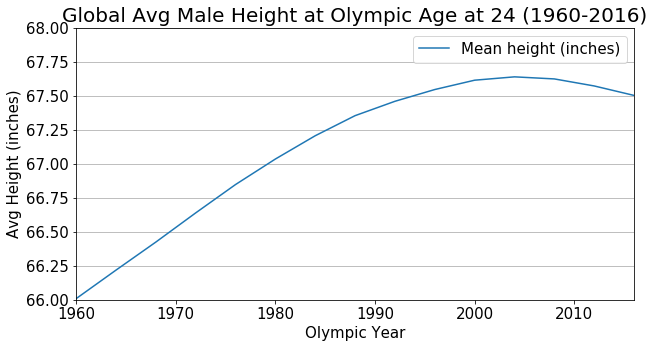

In [13]:
# group by object to average height for males, across Olympic years (Year of Birth + Offset)
avg_df = pd.DataFrame(globalOlympic.groupby('Olympic Year')['Mean height (inches)'].mean().reset_index())

# avg_df.head(20)

# plot for fun
male_avg = avg_df.plot(
    x = 'Olympic Year',
    y = 'Mean height (inches)',
    figsize=(10,5),
    ylim = (66,68),
    fontsize = 15
)

# add axis labels
male_avg.set_xlabel("Olympic Year", fontsize=15)
male_avg.set_ylabel('Avg Height (inches)', fontsize=15)
male_avg.yaxis.grid(True)
male_avg.legend(loc='best',fontsize=15)
male_avg.set_title('Global Avg Male Height at Olympic Age at 24 (1960-2016)', fontdict={'fontsize': 20, 'fontweight': 'medium'})

male_avg.get_figure().savefig('..\images\global_male_avg.png')    


### save clean data to csv, to be used when datasets are combined

In [11]:
full_file = os.path.join("..", "data", "cleanData", "Mens_WorldHeight_1960_2016.csv")
globalOlympic.to_csv(full_file, index=False, header=True)

full_file = os.path.join("..", "data", "cleanData", "Mens_WorldHeight_Avg.csv")
avg_df.to_csv(full_file, index=False, header=True)
